<a href="https://colab.research.google.com/github/annms1/Mnist/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install eli5

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import LearningRateScheduler
import eli5 

In [26]:
print(tf.__version__)

2.7.0


In [27]:
mnist = tf.keras.datasets.fashion_mnist

In [28]:

(train_img, train_labels), (test_img, test_labels) = mnist.load_data()

In [29]:
train_img = train_img/255.0
test_img = test_img/255.0

In [30]:
len(train_img)

60000

In [31]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

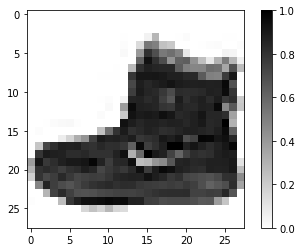

In [32]:
plt.figure()
plt.imshow(train_img[0], cmap=plt.cm.binary)
plt.colorbar()
plt.gca().grid(False)

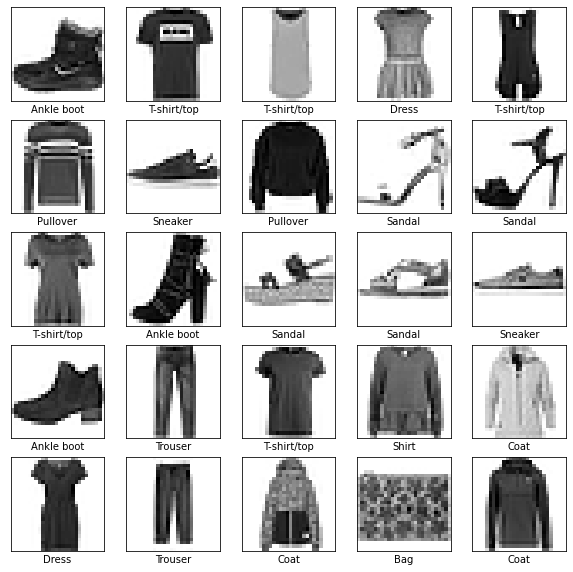

In [33]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_img[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [34]:

train_img.shape

(60000, 28, 28)

In [35]:
def model_predictions(model, test_img, sub1, sub2):
    ls = []
    pred = model.predict(test_img[sub1:sub2])
    for i in range(sub1, sub2):
      ls.append(class_names[np.argmax(pred[i])])
    return ls

In [36]:
def listing(range_1, range_2, labels):
    ls = []
    for i in range(range_1, range_2):
      ls.append(labels[i])
      print(class_names[ls[i]])
    return

In [37]:
listing(0, 20, test_labels)

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker
Coat
Sandal
Sneaker
Dress
Coat
Trouser
Pullover
Coat
Bag
T-shirt/top


In [38]:

class_names[test_labels[0]]

'Ankle boot'

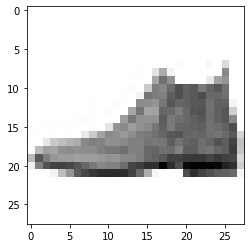

In [39]:
plt.imshow(test_img[0], cmap=plt.cm.binary)

T-shirt/top


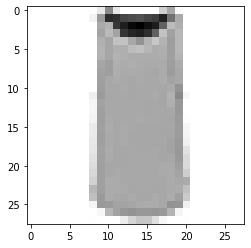

In [40]:
plt.imshow(train_img[2], cmap=plt.cm.binary)
print(class_names[train_labels[2]])

In [41]:
def get_lr(init_lr, lr_decay, name):
    def exp_decay(epoch):
        lr = init_lr * np.exp(-lr_decay * epoch)
        return lr
    lr_sche = LearningRateScheduler(exp_decay)
    name = [lr_sche]
    return name

In [42]:
tf.random.set_seed(30)

model_1 = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(100, activation=tf.nn.relu),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_img, train_labels, epochs=8, validation_data=(test_img, test_labels), callbacks=get_lr(0.0015, 0.04, "callback_1"))

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4965 - accuracy: 0.8210 - val_loss: 0.4393 - val_accuracy: 0.8390 - lr: 0.0015
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3698 - accuracy: 0.8640 - val_loss: 0.3950 - val_accuracy: 0.8597 - lr: 0.0014
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3324 - accuracy: 0.8773 - val_loss: 0.3844 - val_accuracy: 0.8620 - lr: 0.0014
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8839 - val_loss: 0.3475 - val_accuracy: 0.8753 - lr: 0.0013
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2926 - accuracy: 0.8912 - val_loss: 0.3564 - val_accuracy: 0.8689 - lr: 0.0013
Epoch 6/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2795 - accuracy: 0.8962 - val_loss: 0.3396 - val_accuracy: 0.8781 - lr: 0.0012
Epoch 7/8
1875/1875 [==============================] - 5s 2ms/st

In [43]:
test_loss, test_acc = model_1.evaluate(test_img, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 0.8809


In [44]:
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

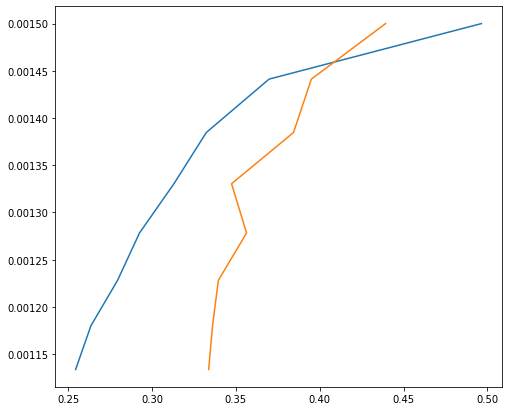

In [45]:
plt.figure(figsize=(8, 7))
plt.plot(history_1.history["loss"], history_1.history["lr"])
plt.plot(history_1.history["val_loss"], history_1.history["lr"])
plt.show()

In [46]:
tf.random.set_seed(30)

cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation="relu"))

cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

cnn.add(tf.keras.layers.Conv2D(32, (2, 2), activation="relu"))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(100, activation="relu"))
cnn.add(tf.keras.layers.Dense(64, activation="relu"))
cnn.add(tf.keras.layers.Dense(10, activation="softmax"))

cnn.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])

history_2 = cnn.fit(train_img, train_labels, batch_size=32, epochs=8, validation_data=(test_img, test_labels), callbacks=get_lr(0.0012, 0.027, "callback_2"))

Epoch 1/8
1875/1875 [==============================] - 14s 4ms/step - loss: 0.4039 - accuracy: 0.8537 - val_loss: 0.3434 - val_accuracy: 0.8743 - lr: 0.0012
Epoch 2/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2639 - accuracy: 0.9024 - val_loss: 0.2733 - val_accuracy: 0.8972 - lr: 0.0012
Epoch 3/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2156 - accuracy: 0.9205 - val_loss: 0.2602 - val_accuracy: 0.9058 - lr: 0.0011
Epoch 4/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1812 - accuracy: 0.9324 - val_loss: 0.2592 - val_accuracy: 0.9092 - lr: 0.0011
Epoch 5/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1524 - accuracy: 0.9429 - val_loss: 0.2392 - val_accuracy: 0.9145 - lr: 0.0011
Epoch 6/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1252 - accuracy: 0.9532 - val_loss: 0.2556 - val_accuracy: 0.9205 - lr: 0.0010
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/s

In [47]:
test_loss, test_acc = cnn.evaluate(test_img, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3046 - accuracy: 0.9225


In [53]:
model_predictions(cnn, test_img, 0, 20), listing(0, 20, test_labels)

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker
Coat
Sandal
Sneaker
Dress
Coat
Trouser
Pullover
Coat
Bag
T-shirt/top


(['Ankle boot',
  'Pullover',
  'Trouser',
  'Trouser',
  'Shirt',
  'Trouser',
  'Coat',
  'Shirt',
  'Sandal',
  'Sneaker',
  'Coat',
  'Sandal',
  'Sandal',
  'Dress',
  'Coat',
  'Trouser',
  'Pullover',
  'Shirt',
  'Bag',
  'T-shirt/top'],
 None)

In [49]:
history_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

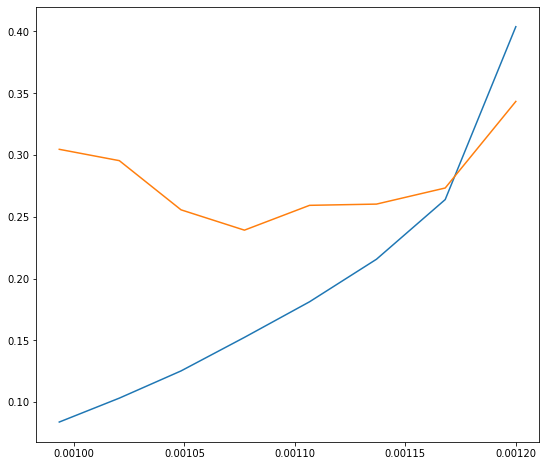

In [50]:
plt.figure(figsize=(9, 8))
plt.plot(history_2.history["lr"], history_2.history["loss"])
plt.plot(history_2.history["lr"], history_2.history["val_loss"])
plt.show()